<h1>Uk Road Accident</h1>

In [21]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns 
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [22]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [23]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [24]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [25]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h1>Describe Analytics</h1>

In [26]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [27]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


In [28]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [29]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

In [31]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, erorrs = 'coerce')

TypeError: to_datetime() got an unexpected keyword argument 'erorrs'

In [ ]:
accident.dtypes

<h1>Extracting date information using date time</h1>

In [ ]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek # Monday=0. Sunday=6

In [ ]:
accident.isnull().sum()

<h1>25 QUESTIONS</h1>

<h1>1. Which district area recorded the most accident</h1>

In [33]:
district= accident['District Area'].value_counts()

In [34]:
district

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

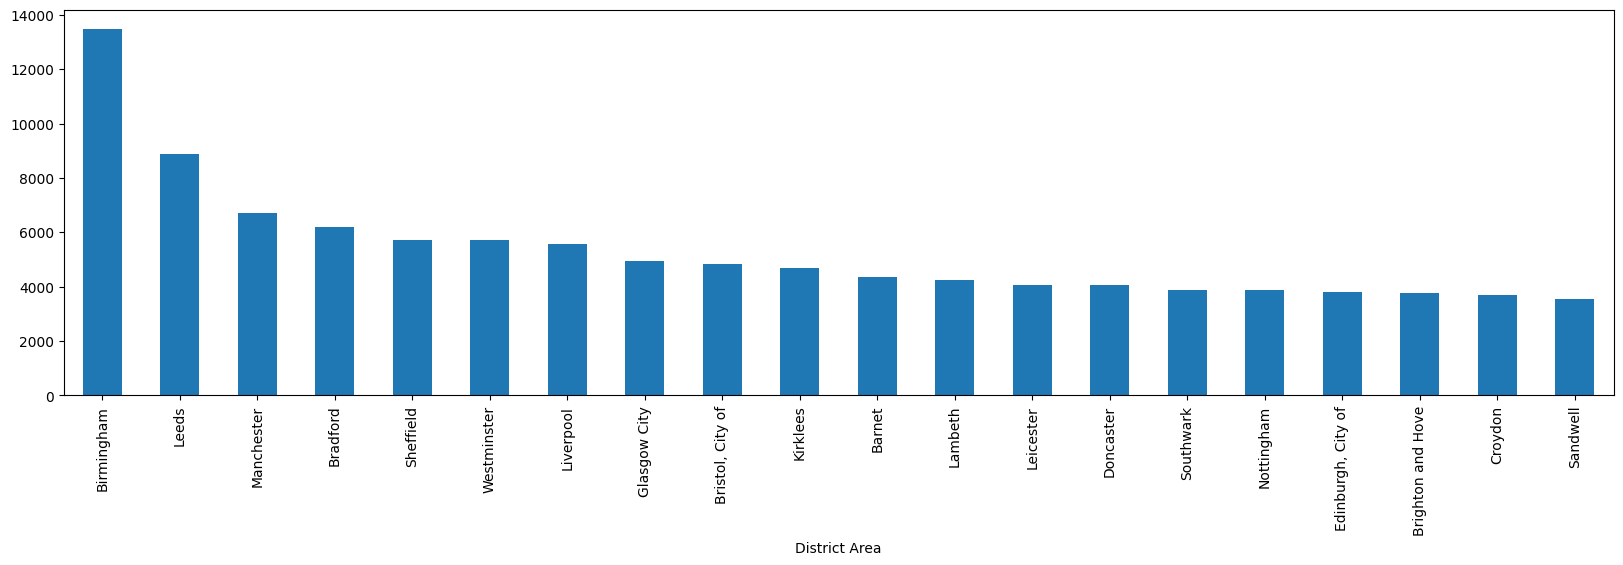

In [62]:
district.nlargest(20).plot(kind='bar', figsize=(20, 5))  # Top 5 highest values
plt.show()


<h1>2. What is the distribution of accident severity types across the dataset</h1>

<h1>3. Which weather condition is most commonly associated with accident</h1>

<h1>4. On which day of the week do accident occur most frequently</h1>

<h1>5. Which road type is most often linked to serious accident</h1>

<h1>6. What is the average  number of vehicles involve in accident in urban areas compared to rural areas?</h1>

<h1>7. Which light condition is most frequently associated with fatal accidents?</h1>

<h1>8. What is the trend of accidents per year in the dataset?</h1>

<h1>9. Which vehicle type is most commonly involved in accident?</h1>

<h1>10. district area records the highest number of casualties?</h1>

<h1>11. What proportion of accidents occured on wet or damp roads compared to dry roads?</h1>

<h1>12. Which month of the year has the highest accident count?</h1>

<h1>13. Do rural areas show higher accident severity compared to urban areas?</h1>

<h1>14. Which  combination of road surface condition and weather condition is most frequent in accident cases?</h1>

<h1>15. What is the median number of casualities in accident involving buses or coaches?</h1>

<h1>16. Which vehicle type is most frequently involved in accident during darkness without street lighting?</h1>

<h1>17. Are single carriageways more dangerous compared to dual carriageways in term of accident severity</h1>

<h1>18. Which  three district areas have the lowest accident frequency</h1>

<h1>19. What is the most common accident severity when the road surface is icy or snowy</h1>

<h1>20. Which accident location (latitude and longtitude) has the highest accident density?</h1>